# Guitar Basic Chord Classification Using CNN

**Objective** : This notebook's main focus will be on how to use CNN and Keras to categorize photos of the hand position used to create the guitar's fundamental chord. We want to know the following things in particular.

- **How accurately does CNN classify images?**
- **Which images are best for classification: grayscale, or colored?**
- **What is the best activation function used in the hidden layer?: relu or tanh**

### Import Libraries

1. **Library matplotlib, seaborn** required for **image visualization**.
2. **Library tensorflow,keras** required for **modelling and load the images**.
3. **Sklearn** required for **evaluate the models**.
4. **Pillow** required for **extract metadata of images**

In [35]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
import os
from PIL import Image
import numpy as np

### Load Data

In [36]:
trainPath = '../Data/train/'
valPath = '../Data/val/'
testPath = '../Data/test/'

In [37]:
#Training
train = tf.keras.utils.image_dataset_from_directory(trainPath,
                                                            labels='inferred',
                                                            label_mode='categorical',
                                                            shuffle=True)

#Validation
validation = tf.keras.utils.image_dataset_from_directory(valPath,
                                                            labels='inferred',
                                                            label_mode='categorical',
                                                            shuffle=True)

#Test
test = tf.keras.utils.image_dataset_from_directory(testPath,
                                                            labels='inferred',
                                                            label_mode='categorical',
                                                            shuffle=True)

Found 1059 files belonging to 7 classes.
Found 140 files belonging to 7 classes.
Found 215 files belonging to 7 classes.


### Let's explore the dataset

Here's some questions:

- How many training,testing and validation examples do we have ?
- What is the size of the images ?
- What is the proportion of each observed category ?

In [38]:
n_train = len(np.concatenate([i for x, i in train], axis=0))
n_test = len(np.concatenate([i for x, i in test], axis=0))
n_valid = len(np.concatenate([i for x, i in validation], axis=0))


print("Train Num      : ", n_train)
print("Test Num       : ", n_test)
print("Validation Num : ", n_valid)

Train Num      :  1059
Test Num       :  215
Validation Num :  140


In [39]:
def metadata(image):
    image = Image.open(image)

    info_dict = {
    "Image Size": image.size,
    "Image Height": image.height,
    "Image Width": image.width,
    "Image Format": image.format,
    "Image Mode": image.mode,
    }

    for label,value in info_dict.items():
        print(f"{label:25}: {value}")


imageTrain = '../Data/train/A/IMG_0340.jpeg'
imageTest = '../Data/test/A/IMG_0336.jpeg'
imageVal = '../Data/val/A/IMG_0349.jpeg'

print("Data Train")
metadata(imageTrain)

print("\nData Test")
metadata(imageTrain)

print("\nData Validation")
metadata(imageTrain)

Data Train
Image Size               : (4032, 3024)
Image Height             : 3024
Image Width              : 4032
Image Format             : JPEG
Image Mode               : RGB

Data Test
Image Size               : (4032, 3024)
Image Height             : 3024
Image Width              : 4032
Image Format             : JPEG
Image Mode               : RGB

Data Validation
Image Size               : (4032, 3024)
Image Height             : 3024
Image Width              : 4032
Image Format             : JPEG
Image Mode               : RGB


In [40]:
# class names
class_names = os.listdir(trainPath)
print('All category : ',class_names)

All category :  ['A', 'B', 'C', 'D', 'E', 'F', 'G']


In [41]:
def countImage(path):
    count  = []
    for x in os.listdir(path):
        count.append(len(os.listdir(path + x)))
    return count


trainCount = countImage('../Data/train/')
testCount = countImage('../Data/test/')
valCount = countImage('../Data/val/')


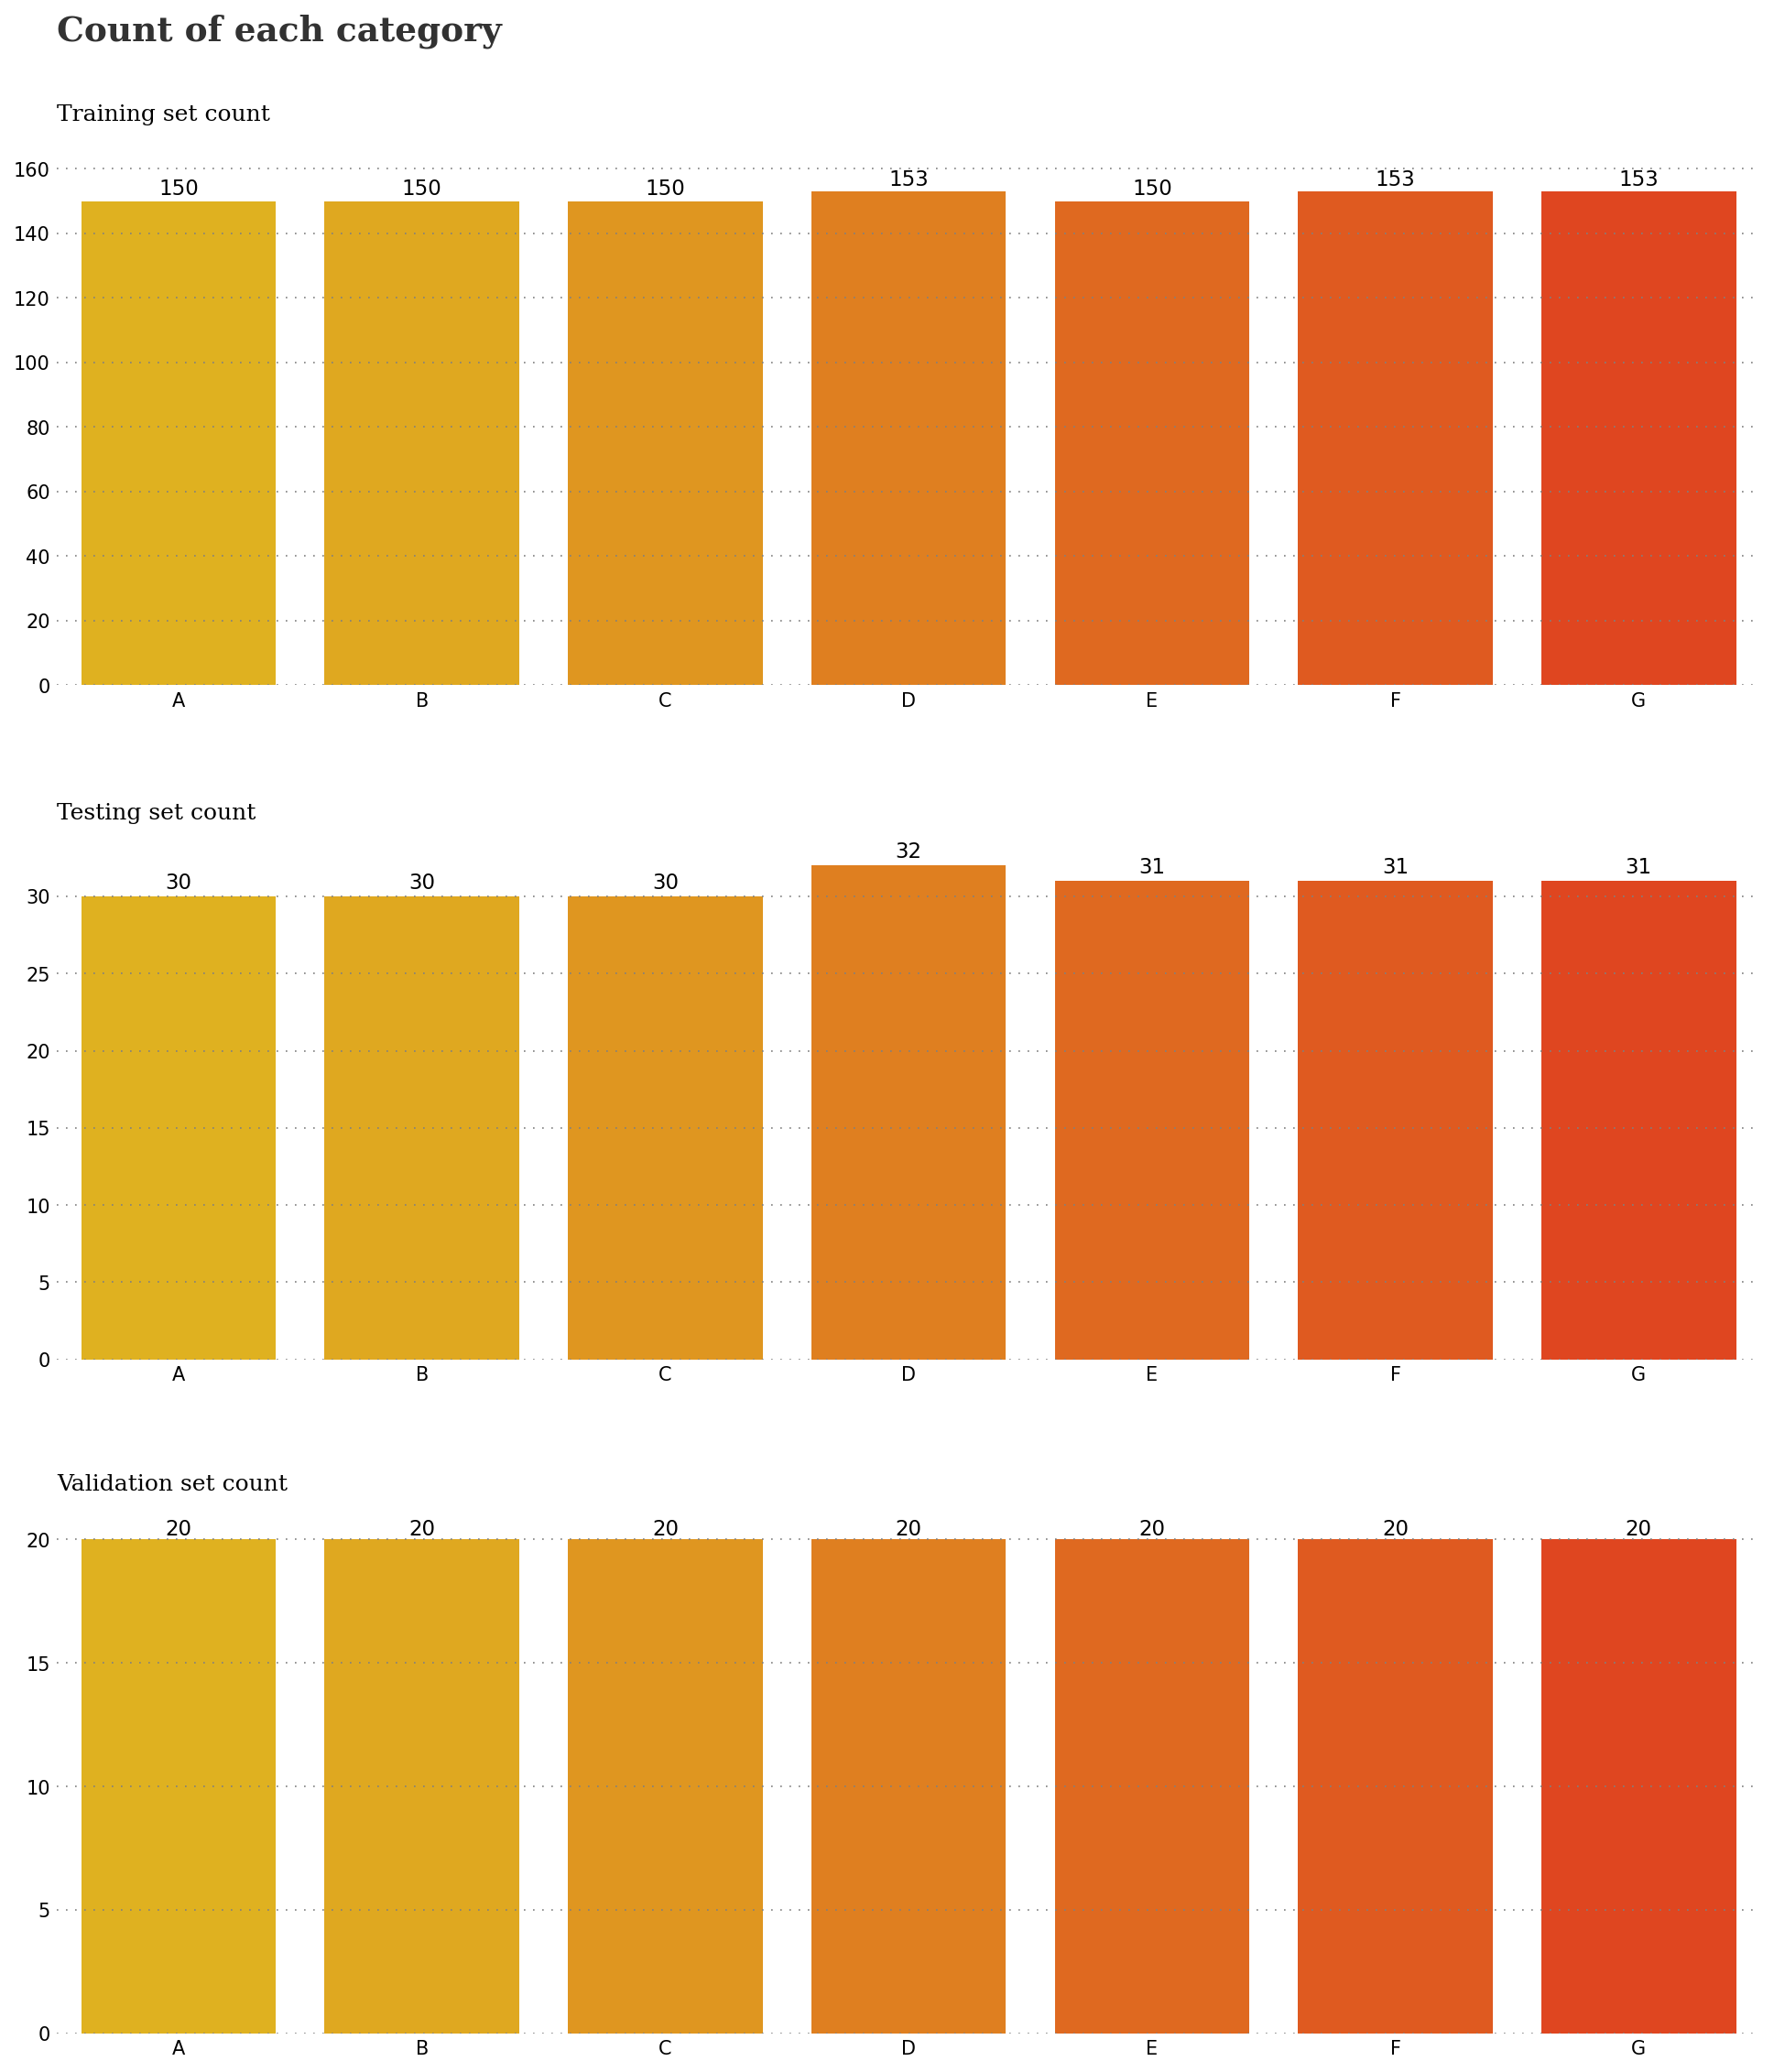

In [42]:
custom_palette = ['#ffc100','#ffb600','#ff9e00','#ff7f00','#ff6100','#ff4d00','#ff3300']
sns.set_palette(custom_palette)


fig = plt.figure(figsize=(16, 18), dpi=150)

gs = fig.add_gridspec(3, 1)
gs.update(wspace=0.4, hspace=0.3)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[1, 0])
ax2 = fig.add_subplot(gs[2, 0])

#AX0 - Data Train
ax0.text(-0.5, 200, 'Count of each category', fontsize=18,
         fontweight='bold', fontfamily='serif', color="#323232")
ax0.text(-0.5, 175, 'Training set count',
         fontfamily='serif', fontsize=12, fontweight='light')
sns.barplot(x=class_names,y=trainCount, ax=ax0)
for i in range(7):
    ax0.annotate(f'{trainCount[i]}', 
                    xy =(i, trainCount[i]+2),
                    color='black',
                    horizontalalignment='center',
                    fontsize=11,
                    fontweight='light'
                    )

#AX1 - Data Test
ax1.text(-0.5, 35, 'Testing set count',
         fontfamily='serif', fontsize=12, fontweight='light')
sns.barplot(x=class_names,y=testCount, ax=ax1)
for i in range(7):
    ax1.annotate(f'{testCount[i]}', 
                    xy =(i, testCount[i]+0.5),
                    color='black',
                    horizontalalignment='center',
                    fontsize=11,
                    fontweight='light'
                    )



ax2.text(-0.5, 22, 'Validation set count',
         fontfamily='serif', fontsize=12, fontweight='light')
sns.barplot(x=class_names,y=valCount, ax=ax2)
for i in range(7):
    ax2.annotate(f'{valCount[i]}', 
                    xy =(i, valCount[i]+0.2),
                    color='black',
                    horizontalalignment='center',
                    fontsize=11,
                    fontweight='light'
                    )
ax2.set_yticks([0,5,10,15,20])

for s in ["top", "right",'left','bottom']:
    for i in range(0, 3):
        locals()["ax"+str(i)].spines[s].set_visible(False)

for i in range(0, 3):
    locals()["ax"+str(i)].tick_params(axis=u'both', which=u'both', length=0)
    locals()["ax"+str(i)].grid(color='gray', linestyle=':',
                               axis='y', zorder=0,  dashes=(1, 5))

**Key take points**:
- **Training set** has the most amount of images, as expected
- The image has the size of **(4032, 3024)**, we can resize it later
- There were 8 category, as expected
- The proportion of each category in the training set is relatively balance, as expected

#### Visualize the data
We can display a random image from the training set.

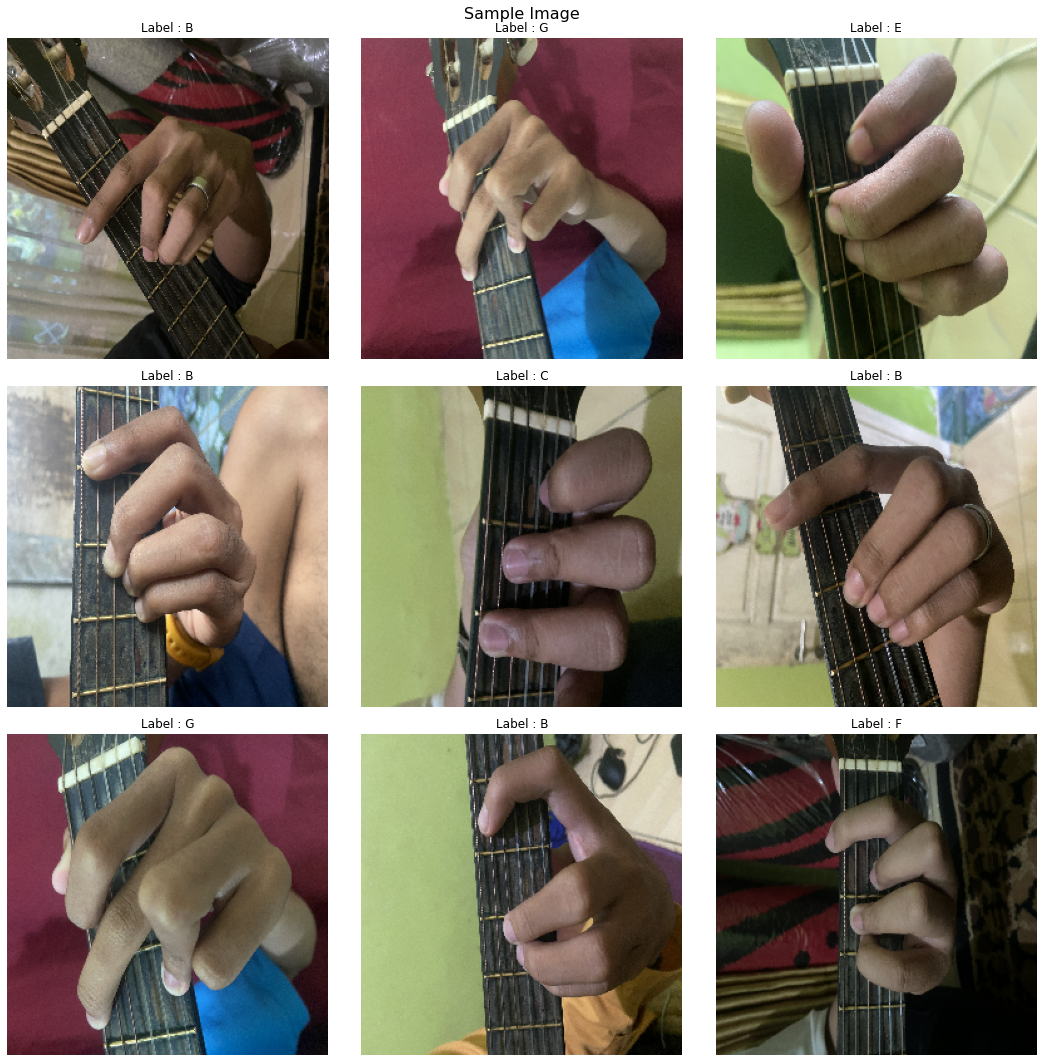

In [43]:
plt.figure(figsize=(15, 15))
class_names = test.class_names
for images, labels in test.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f'Label : {class_names[tf.argmax(labels[i])]}')
        plt.axis("off")

plt.suptitle('Sample Image',fontsize='16')
plt.tight_layout()


### Lets preprocess the image
Here's what we're gonna do in preprocessing:
- **Resize**            : To improve computational efficiency and ensure consistency across images.
- **Adjust Brightness** : To improve visibility of the image and to create a more uniform brightness across the entire image
- **Adjust Saturation** : To enhance color in the image
- **Normalization**     : Ensures that each input parameter (pixel, in this case) has a similar data distribution

In [122]:
# Function to take sample before and after enhancement
def sample_img(image1, image2):
    plt.figure(figsize=(10,10))

    plt.subplot(1, 2, 1)
    plt.title("Before")
    plt.imshow(image1.numpy().astype("uint8"))
    plt.axis(False)

    plt.subplot(1, 2, 2)
    plt.title("After")
    plt.imshow(image2.numpy().astype("uint8"))
    plt.axis(False)


for images, labels in train.take(1):
    sample_image = images[1]


**Resize**

In [52]:
def resize(image,label):
    return tf.image.resize(image,[256,256]),label

train = train.map(resize)
test = test.map(resize)
validation = validation.map(resize)

**Adjust Brightness**

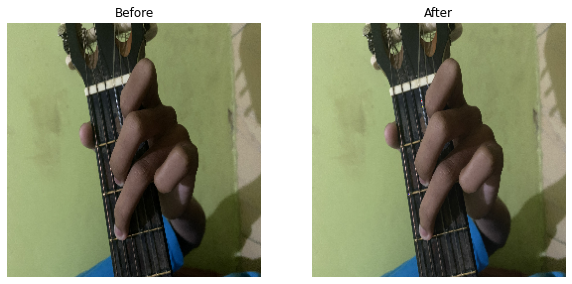

In [139]:
def brightness(image,label):
    return tf.image.adjust_brightness(image,delta = 0.5),label

train = train.map(brightness)

sample_img(sample_image, tf.image.adjust_brightness(sample_image,delta = 9))

**Adjust Saturation**

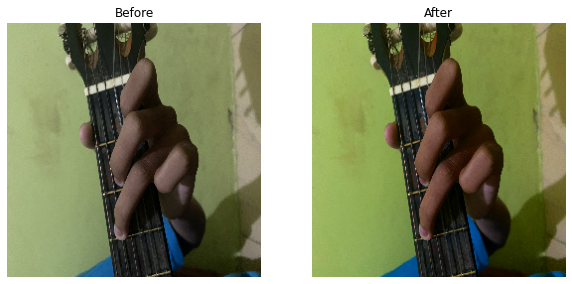

In [140]:
def saturation(image,label):
    return tf.image.adjust_saturation(image,saturation_factor = 1.6),label

train = train.map(saturation)

sample_img(sample_image, tf.image.adjust_saturation(sample_image,saturation_factor = 1.6))

**Normalize**

In [141]:
def normalize(image,label):
    return tf.cast(image,tf.float32) / 255.0,label

train = train.map(normalize)
test = test.map(normalize)
validation = validation.map(normalize)

**Grayscalling**

Convert images to grayscale and save it to a temporary variable to be used in modelling later

In [143]:
def grayScale(images,label):
    return tf.image.rgb_to_grayscale(images),label


train_grayscale = train.map(grayScale)
test_grayscale = test.map(grayScale)
validation_grayscale = validation.map(grayScale)

### Modelling

In [145]:
earlyStopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=5,
)

In [147]:
def model(train_set,validation_set,test_set,activation,image_channels):
    model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu',
                           input_shape=(256, 256, 3)),  

    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation=activation),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation=activation),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation=activation),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),  
    tf.keras.layers.Dense(64, activation=activation),
    tf.keras.layers.Dense(7, activation='softmax')  
    ])

    model.compile(optimizer='adam', loss = 'categorical_crossentropy',metrics=['accuracy'])
    results = model.fit(train_set, epochs=30,batch_size=32,validation_data=validation_set,verbose=1,callbacks=[earlyStopping])
    test_evaluate = model.evaluate(test,verbose =0)

    return hasil,test_evaluate


In [148]:
rgb_relu_result,rgba_relu_evaluate = model(train,validation,test,'relu',3)

Epoch 1/30
 2/34 [>.............................] - ETA: 3:21 - loss: 2.2188 - accuracy: 0.1406 

KeyboardInterrupt: 

In [ ]:
rgb_tanh_result,rgba_tanh_evaluate = model(train,validation,test,'tanh',3)

## Evaluate

#### Evaluasi Test Set

In [ ]:

print(f'Test loss     : {test_evaluate[0]}')
print(f'Test accuracy : {round(test_evaluate[1],2)}')

Test loss     : 0.20843549072742462
Test accuracy : 0.93


#### Bandingkan perkembangan epoch

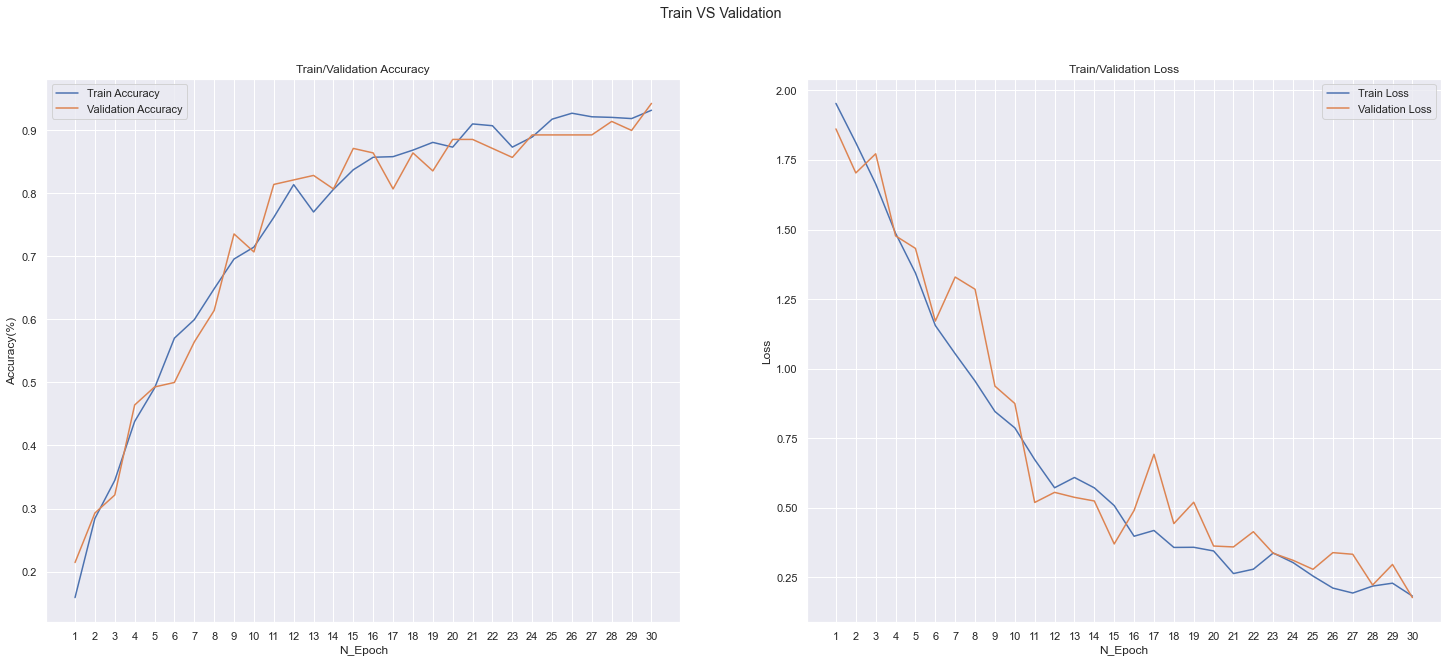

In [ ]:
epoch = [i+1 for i in range(30)]


plt.figure(figsize=(25, 10))
plt.suptitle('Train VS Validation')

#Subplot Akurasi
plt.subplot(1,2,1)
sns.lineplot(x=epoch,y = hasil.history['accuracy'],label ='Train Accuracy')
sns.lineplot(x=epoch,y = hasil.history['val_accuracy'],label ='Validation Accuracy')

plt.xticks(epoch)
plt.ylabel('Accuracy(%)')
plt.xlabel('N_Epoch')
plt.title("Train/Validation Accuracy")

#Subplot Loss
plt.subplot(1,2,2)
sns.lineplot(x=epoch,y = hasil.history['loss'],label ='Train Loss')
sns.lineplot(x=epoch,y = hasil.history['val_loss'],label ='Validation Loss')

plt.xticks(epoch)
plt.title("Train/Validation Loss")
plt.xlabel('N_Epoch')
plt.ylabel('Loss')
plt.show()


#### Preview hasil prediksi

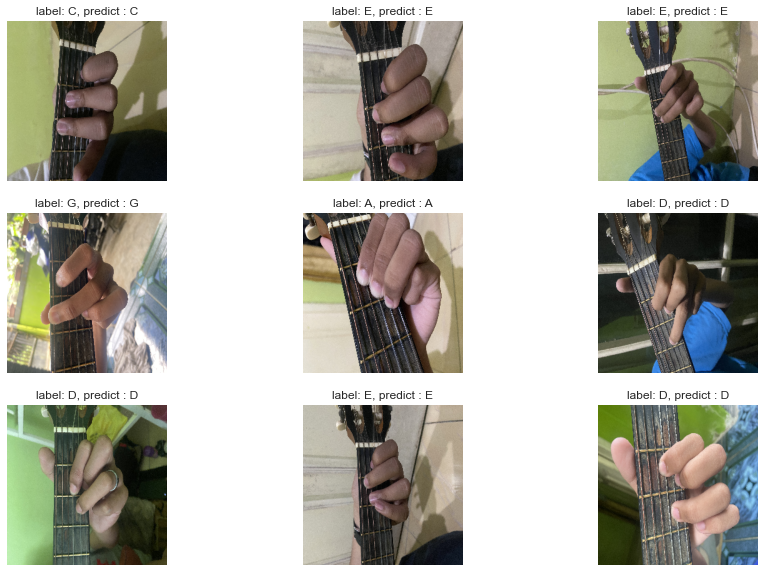

In [ ]:
image ,label = next(iter(test))

plt.figure(figsize=(15,10))
for i in range(9) :
    TrueLabel = class_names[np.argmax(label[i])]
    plt.subplot(3,3,i+1)
    plt.axis('off')
    y_pred = np.argmax(model.predict(image[i][None,...],verbose=0))
    plt.imshow(tf.squeeze(image[i]))
    plt.title(f'label: {TrueLabel}, predict : {class_names[y_pred]}')

#### Preview prediction error

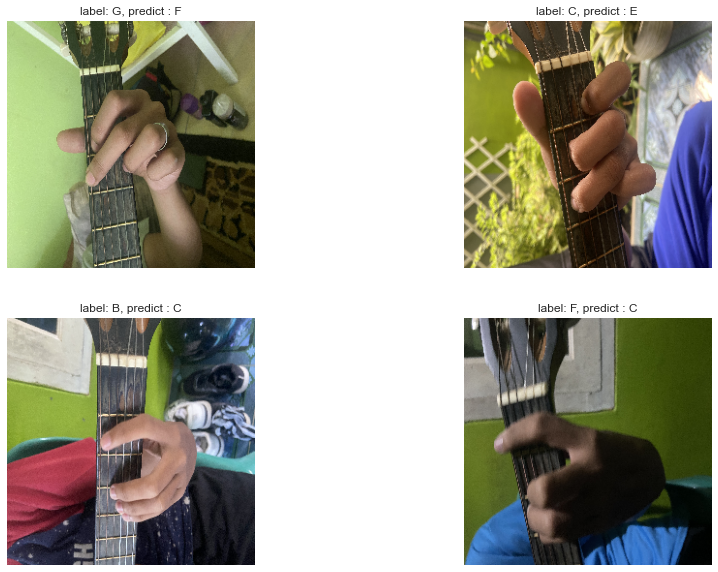

In [ ]:
#Plot prediction Error
image ,label = next(iter(test))
plt.figure(figsize=(15,10))
i,j = 0,0
while (j < 4):
    TrueLabel = class_names[np.argmax(label[i])]
    plt.subplot(2,2,j+1)
    plt.axis('off')
    y_pred = np.argmax(model.predict(image[i][None,...],verbose=0))
    if (TrueLabel != class_names[y_pred]):
        plt.imshow(tf.squeeze(image[i]))
        plt.title(f'label: {TrueLabel}, predict : {class_names[y_pred]}')
        j+=1
    i+=1

#### Confusion Matrix

In [ ]:
y_test = []
y_pred = []

for i in range(len(test)) :
    x,y = test.next()
    for j in range(len(y)) :
        y_test.append(class_names[tf.argmax(y[j])])
        y_pred.append(class_names[np.argmax(model.predict(x[j][None,...],verbose=0))])

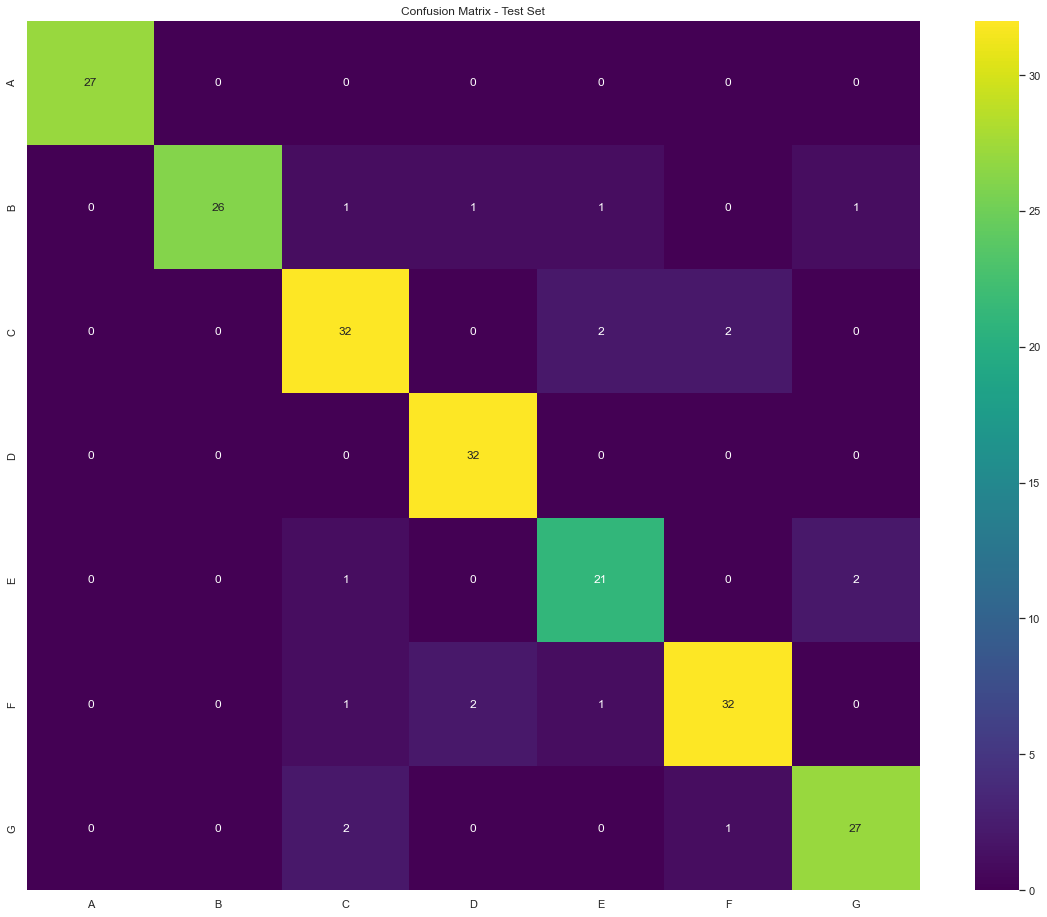

In [ ]:
plt.figure(figsize=(20, 16))
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm,annot=True,fmt='d',xticklabels=class_names,yticklabels=class_names,cmap='viridis')
plt.title("Confusion Matrix - Test Set")
plt.show()

### Classification Report

In [ ]:

print('Classification Report')
print(classification_report(y_test, y_pred, target_names=class_names))

Classification Report
              precision    recall  f1-score   support

           A       1.00      1.00      1.00        27
           B       1.00      0.87      0.93        30
           C       0.86      0.89      0.88        36
           D       0.91      1.00      0.96        32
           E       0.84      0.88      0.86        24
           F       0.91      0.89      0.90        36
           G       0.90      0.90      0.90        30

    accuracy                           0.92       215
   macro avg       0.92      0.92      0.92       215
weighted avg       0.92      0.92      0.92       215

